## Objetivo do modelo: 
### Distinguir com base na altura e largura da sépalas e da pétalas das flores qual o tipo de íris (espectro luminoso) que a flor apresenta. No caso as observações estão em cm. Os valores 0 representam a tipo íris setosa, o valor 1 indica o tipo Versicolor e o valor 2 indica o tipo Virginica

In [20]:
# importando as bibliotecas
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

In [76]:
# importando e visualizando a base de dados
iris = datasets.load_iris()
display(iris)
classes = ['Setosa', 'Versicolor', 'Virginica']
x = iris.data
y = iris.target

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [33]:
# transformando array em uma dataframe para facilitar a plotagem de gráficos
df = pd.DataFrame(x)
display(df)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


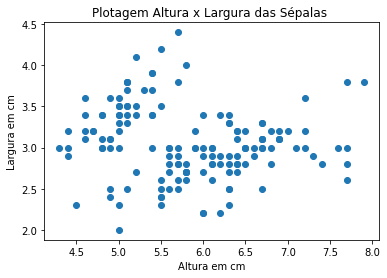

In [51]:
fig, ax = plt.subplots()
ax.scatter(df[0], df[1])
plt.title("Plotagem Altura x Largura das Sépalas ")
plt.xlabel("Altura em cm" )
plt.ylabel("Largura em cm")
plt.show()

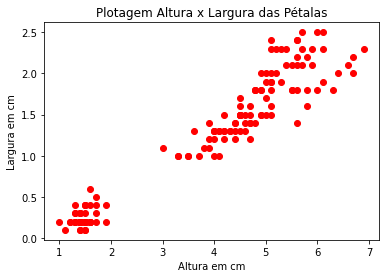

In [52]:
fig, ax = plt.subplots()
ax.scatter(df[2], df[3], color = "red")
plt.title("Plotagem Altura x Largura das Pétalas")
plt.xlabel("Altura em cm" )
plt.ylabel("Largura em cm")
plt.show()

In [54]:
# seperando a nossa base de teste em 80% treino e em 20% teste
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [18]:
# verificando se a função separou corretamente em base de treino e base de teste
print(x_train.shape)
print(x_test.shape)

(120, 4)
(30, 4)


In [74]:
# definindo o modelo que será usado.
# Vamos usar o modelo SVM. Esse modelo usa métodos de classificação, regressão e detecção de outliers
# Basicamente, o algoritmo tenta encontrar padrões que possam classificar as íris das flores com base no
# tamanho das sépalas e das pétalas.
model = svm.LinearSVC()
model.fit(x_train, y_train)
print(model)

LinearSVC()


C:\Users\Vinicius\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [82]:
predictions = model.predict(x_test)
# Podemos verificar as respostas que o modelo entregou com a seguinte repetição:
for i in range(len(predictions)):
    print(classes[predictions[i]])

Setosa
Versicolor
Setosa
Versicolor
Versicolor
Virginica
Versicolor
Virginica
Virginica
Versicolor
Versicolor
Virginica
Virginica
Setosa
Virginica
Setosa
Versicolor
Versicolor
Setosa
Setosa
Setosa
Versicolor
Setosa
Virginica
Virginica
Virginica
Setosa
Setosa
Virginica
Setosa


In [81]:
#Podemos verificar os resultados comparados com os valores realmente esperados.
#Vemos que o nosso modelo possui uma acurácia de 96,6%, ou seja um valor consideravelmente alto!
acc = accuracy_score(y_test, predictions)
print("Valores das predições: ", predictions)
print("Valores da base de teste", y_test)
print("A acurácia do nosso modelo foi %debug:", acc)

Valores das predições:  [0 1 0 1 1 2 1 2 2 1 1 2 2 0 2 0 1 1 0 0 0 1 0 2 2 2 0 0 2 0]
Valores da base de teste [0 1 0 1 1 2 1 2 2 1 1 2 2 0 2 0 1 1 0 0 0 1 0 2 2 1 0 0 2 0]
A acurácia do nosso modelo foi %debug: 0.9666666666666667
